# CORONARY SYNTAX DATASET ANALYSIS

In [1]:
import cv2
import json
import numpy as np
from collections import defaultdict
import scipy
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from dataset_analysis_utils import *

In [2]:
split='val'

# Load in the images
with open(f"arcade/syntax/{split}/annotations/{split}.json", encoding="utf-8") as file:
    gt = json.load(file)
vpath = f"arcade/syntax/{split}/images/"

#load in images
valstore = store_images(gt, vpath)

#load in annotations
vpoints = get_points(gt)

#load in masks
vmasks = get_masks(gt, task='syntax',split=split)

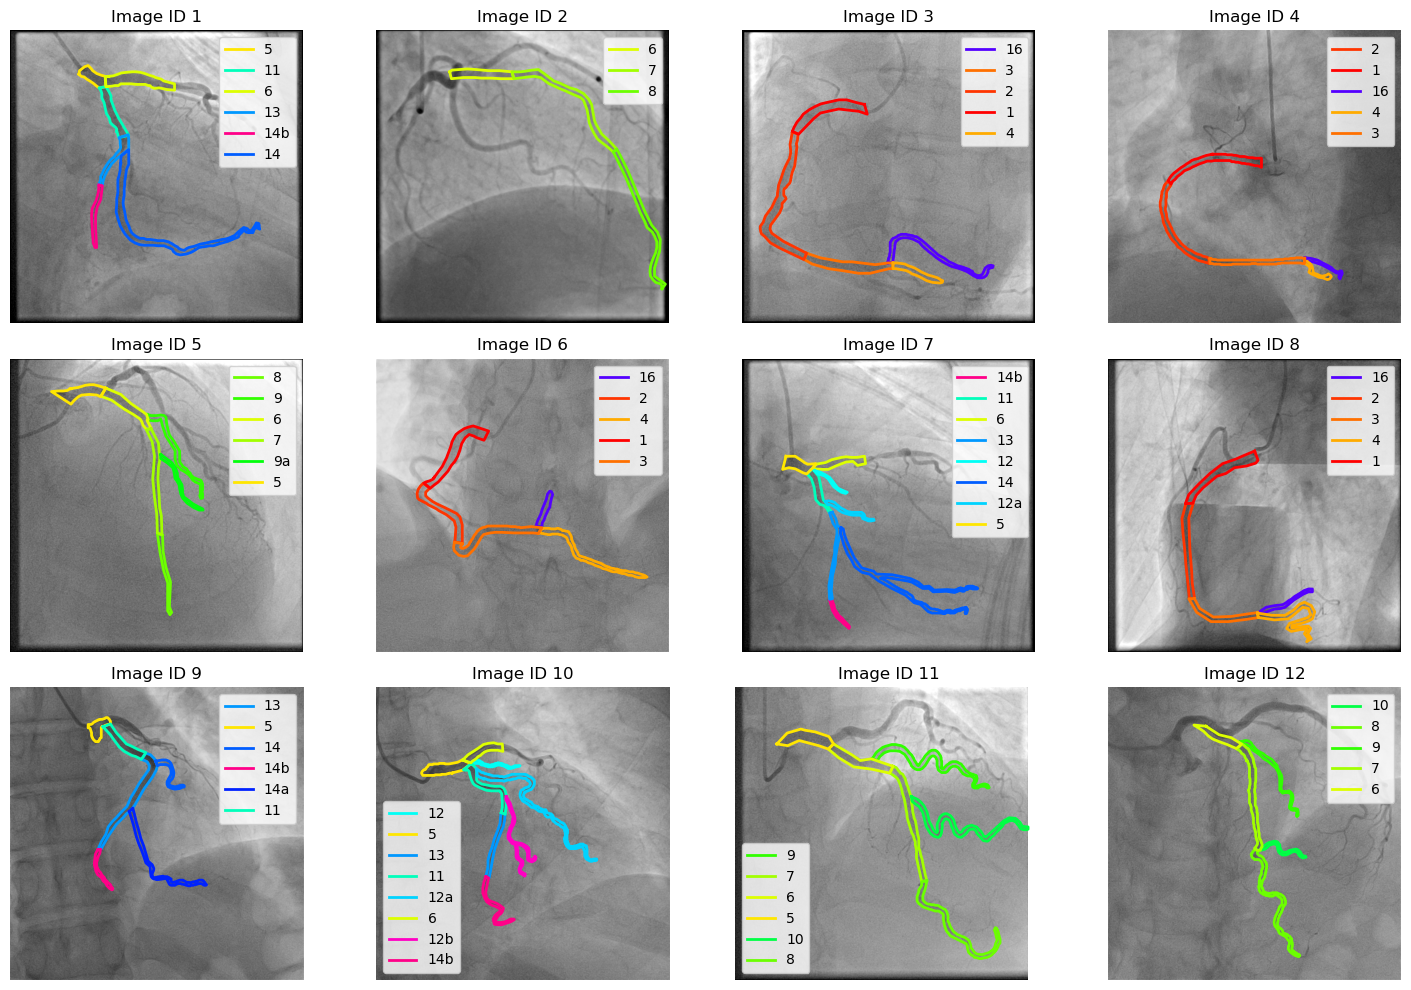

In [3]:
cats={}
for i in gt['categories']:
    cats[i['id']]=i['name']

plot_points(valstore, vpoints, cats)

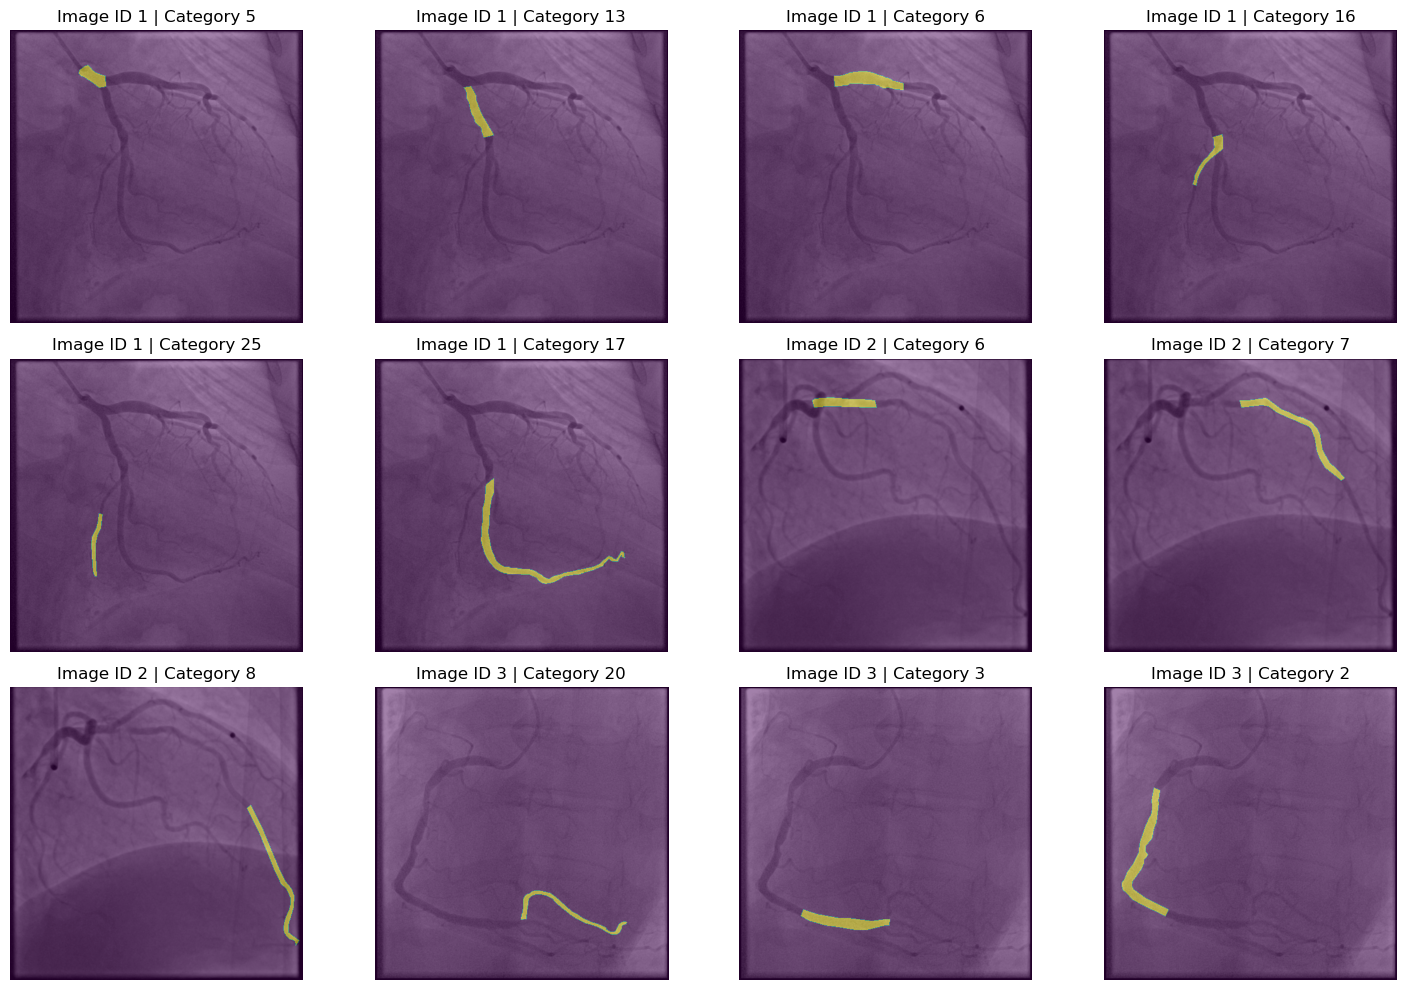

In [4]:
plot_masks(gt, valstore, vmasks, task='syntax')

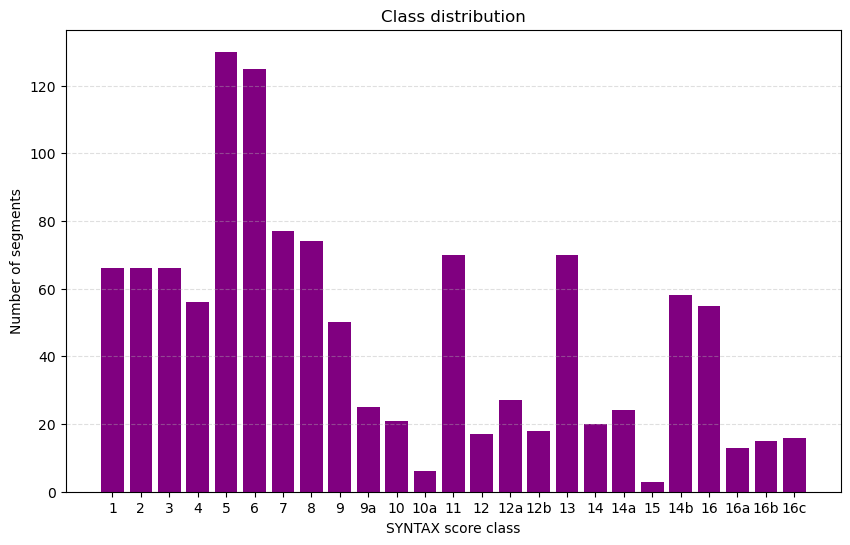

In [5]:
# Class distribution analysis
def calc_pct(pct, allvars):
    absolute = int(np.round(pct/100.*np.sum(allvars)))
    return f"{pct:.1f}%\n({absolute:d})"

def orderarray(arr, fromIdx, toIdx):
    element = arr[fromIdx]
    arr.pop(fromIdx)
    arr.insert(toIdx, element)

#get cat_ids, labels and class counts
cat_ids=[]
for ann in gt["annotations"]:
    cat_ids.append(ann["category_id"])
class_names, class_counts=np.unique(cat_ids, return_counts=True)
class_counts=class_counts.tolist()

labels=[]
for data in gt['categories']:
    labels.append(data['name'])
labels=labels[:-1]

#re order
for arr in [labels, class_counts]:
    orderarray(arr,-1,19)
    orderarray(arr,-1,15)

#plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x=class_names, height=class_counts, tick_label=labels, color='purple')
ax.set(title=f'Class distribution', ylabel= 'Number of segments', xlabel='SYNTAX score class')
ax.grid(alpha=0.4, linestyle='--', axis='y')
plt.show()

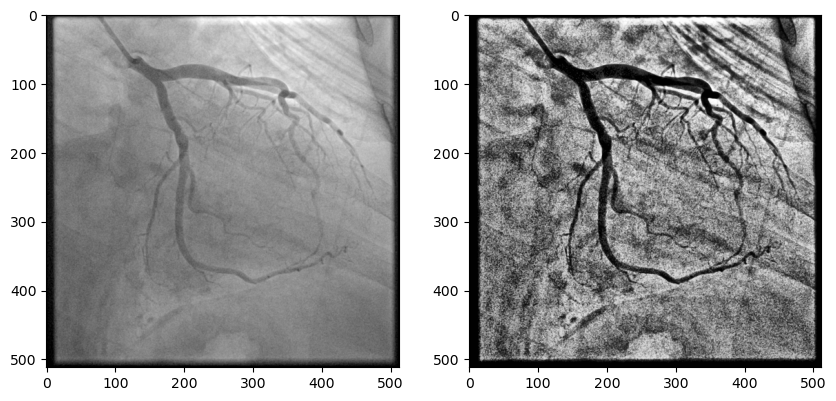

In [6]:
from BaseSeg.Preprocess import preprocess

image = np.array(valstore[1])
preprocessed = preprocess(image)

fig,ax=plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image)
ax[1].imshow(preprocessed, cmap='grey')

In [7]:
# Compare image properties between the raw and preprocessed image above
mask = np.any(vmasks[1], axis=0).astype(np.uint8) 
f = image[mask==1]
b = image[mask==0]
sf = preprocessed[mask==1]
sb = preprocessed[mask==0]

#statistics 
properties=[]
for arr in [f,b,sf,sb]:
    properties.append(calc_intensity_properties(arr))

stats = pd.DataFrame({'Segment':properties[0], 'Preprocessed_Seg':properties[2], 'Background':properties[1], 'Preprocessed_Back':properties[3]})
stats = stats.applymap(lambda x: round(x, 2))
stats

,Segment,Preprocessed_Seg,Background,Preprocessed_Back
max,196.00,221.00,255.00,255.00
min,60.00,0.00,0.00,0.00
mean,112.98,40.95,136.04,120.51
median,111.00,29.00,136.00,126.00
std,15.80,43.63,39.80,58.16


In [8]:
#average raw img properties

#segment/background
fimgs, bimgs = split_into_fg_bg(gt, valstore, vmasks)

#statistics 
propertiesf = calc_intensity_properties(fimgs)
propertiesb = calc_intensity_properties(bimgs)

stats = pd.DataFrame({'Segment':propertiesf, 'Background':propertiesb})
stats = stats.applymap(lambda x: round(x, 2))
stats

,Segment,Background
max,244.00,255.00
min,0.00,0.00
mean,116.06,135.09
median,114.00,132.00
std,28.24,42.80
